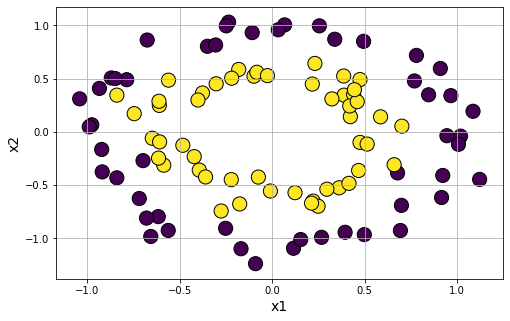

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from rerf.urerf import UnsupervisedRandomForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import make_circles

data = make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=None, factor=0.6)
X1 = data[0]
df = pd.DataFrame(data[0],columns=['x'+str(i) for i in range(1,3)])
df['y'] = data[1]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X1_df = pd.DataFrame(X1, columns=['dim'+ str(i) for i in range(1,3)])

# from itertools import combinations
# from math import ceil
# lst_var=list(combinations(df.columns[:-1],2))
# len_var = len(lst_var)
# plt.figure(figsize=(18,10))
# for i in range(1,len_var+1):
#     plt.subplot(2,ceil(len_var/2),i)
#     var1 = lst_var[i-1][0]
#     var2 = lst_var[i-1][1]
#     plt.scatter(df[var1],df[var2],s=200,c=df['y'],edgecolor='k')
#     plt.xlabel(var1,fontsize=14)
#     plt.ylabel(var2,fontsize=14)
#     plt.grid(True)
    
plt.figure(figsize=(8,5))
plt.scatter(df['x1'],df['x2'],c=df['y'],s=200,edgecolors='k')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)
plt.show()

In [7]:
noise_feats = 10 
noise = np.random.rand(100, noise_feats)  #dim = 200x10
print(noise, noise.shape)

[[4.50910227e-01 7.51967422e-01 6.36530485e-01 9.10468306e-01
  1.35315072e-01 7.15965977e-01 3.59844510e-01 7.48141335e-01
  2.47212605e-01 5.15601671e-01]
 [2.82877120e-01 9.66500483e-01 1.51944597e-01 7.57175930e-01
  1.25905697e-02 5.72687091e-01 2.13923976e-01 9.83589019e-02
  3.21180232e-01 1.04792112e-01]
 [8.71093969e-01 4.57979440e-01 3.69020658e-01 6.23271001e-01
  9.07100155e-01 7.10533774e-01 8.67733520e-01 1.31959517e-01
  5.95536980e-01 7.12319581e-01]
 [3.36944372e-01 6.18276888e-01 5.84726300e-01 5.00360997e-01
  5.11865402e-01 7.03969125e-01 7.22726130e-01 8.53187185e-01
  5.69308712e-01 5.73051160e-01]
 [8.70100357e-01 8.28985226e-01 7.71835149e-02 3.68351135e-01
  1.03626714e-01 5.68676935e-01 4.25726530e-01 8.40224836e-01
  8.60946724e-02 8.36987425e-01]
 [6.37110209e-01 2.19124273e-01 8.66800724e-01 3.28436224e-01
  1.51264589e-01 4.44981625e-01 6.33353167e-01 2.69513827e-01
  2.68515356e-03 1.81005442e-01]
 [2.75137262e-01 6.16120710e-01 8.75055877e-01 6.53510901e

In [8]:
#Center the noise as well
noise -= noise.mean()
#Create a pandas dataframe for the noise dimensional data 
noise_df = pd.DataFrame(noise, columns=['dim'+ str(i) for i in range(1,noise_feats+1)])
print(noise_df)

        dim1      dim2      dim3      dim4      dim5      dim6      dim7  \
0  -0.047745  0.253312  0.137875  0.411813 -0.363340  0.217311 -0.138811   
1  -0.215778  0.467845 -0.346711  0.258521 -0.486065  0.074032 -0.284731   
2   0.372439 -0.040676 -0.129635  0.124616  0.408445  0.211878  0.369078   
3  -0.161711  0.119621  0.086071  0.001706  0.013210  0.205314  0.224071   
4   0.371445  0.330330 -0.421472 -0.130304 -0.395029  0.070022 -0.072929   
5   0.138455 -0.279531  0.368145 -0.170219 -0.347391 -0.053674  0.134698   
6  -0.223518  0.117465  0.376400 -0.433304  0.308563 -0.006772  0.122878   
7  -0.174068  0.442392  0.122136  0.402411 -0.129820  0.058526  0.356762   
8  -0.079938  0.359870  0.407125  0.198392  0.203675 -0.458646  0.163647   
9   0.095575  0.193012  0.351996  0.209578 -0.202165  0.040698 -0.178448   
10 -0.383624  0.478434  0.128907  0.290118 -0.308050 -0.099181 -0.432955   
11  0.153344 -0.097254  0.457621  0.206732 -0.105335  0.079891  0.223435   
12 -0.424445

In [16]:
#concatenate the noise dimensions to the original datset 
input_tot = pd.concat([X1_df, noise_df], axis=1) 

In [17]:
input_tot

,dim1,dim2,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10
0,0.358363,0.224492,-0.047745,0.253312,0.137875,0.411813,-0.363340,0.217311,-0.138811,0.249486,-0.251443,0.016946
1,1.011440,0.388245,-0.215778,0.467845,-0.346711,0.258521,-0.486065,0.074032,-0.284731,-0.400296,-0.177475,-0.393863
2,-0.963532,-0.279133,0.372439,-0.040676,-0.129635,0.124616,0.408445,0.211878,0.369078,-0.366696,0.096882,0.213664
3,-1.034645,0.187994,-0.161711,0.119621,0.086071,0.001706,0.013210,0.205314,0.224071,0.354532,0.070653,0.074396
4,-0.217323,0.906924,0.371445,0.330330,-0.421472,-0.130304,-0.395029,0.070022,-0.072929,0.341569,-0.412561,0.338332
5,-0.890538,-0.401255,0.138455,-0.279531,0.368145,-0.170219,-0.347391,-0.053674,0.134698,-0.229142,-0.495970,-0.317650
6,1.081405,0.061462,-0.223518,0.117465,0.376400,-0.433304,0.308563,-0.006772,0.122878,0.207990,-0.064407,0.496660
7,-0.534018,-0.226544,-0.174068,0.442392,0.122136,0.402411,-0.129820,0.058526,0.356762,0.059133,-0.321933,-0.158466
8,0.427497,0.353440,-0.079938,0.359870,0.407125,0.198392,0.203675,-0.458646,0.163647,0.138909,-0.267426,0.266509
9,0.951637,0.323659,0.095575,0.193012,0.351996,0.209578,-0.202165,0.040698,-0.178448,0.489035,0.462066,0.496004


In [26]:
X = input_tot.iloc[:, :-1].values
Y = data[1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_tot, Y, test_size=0.33)

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
Accuracy = []
Accuracy_D = []

std_clf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
RF = metrics.accuracy_score(y_test, pred_test_std)
RF

0.6363636363636364

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD

std_clf = make_pipeline(StandardScaler(), TruncatedSVD(n_components=2), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
RF_D = metrics.accuracy_score(y_test, pred_test_std)
RF_D

0.48484848484848486

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
Accuracy = [10]


std_clf = make_pipeline(StandardScaler(), SVC(gamma=2, C=1))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
SVM1 = metrics.accuracy_score(y_test, pred_test_std)
SVM1

std_clf = make_pipeline(StandardScaler(), SVC(kernel="linear", C=0.025))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
SVM = metrics.accuracy_score(y_test, pred_test_std)
SVM

std_clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
KNN = metrics.accuracy_score(y_test, pred_test_std)
KNN

Accuracy = [RF, KNN, SVM, SVM1]
Accuracy

[0.6363636363636364,
 0.5151515151515151,
 0.3939393939393939,
 0.45454545454545453]

In [32]:
Accuracy_D = [10]

std_clf = make_pipeline(StandardScaler(),TruncatedSVD(n_components=2), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
RF_D = metrics.accuracy_score(y_test, pred_test_std)
RF_D

std_clf = make_pipeline(StandardScaler(), TruncatedSVD(n_components=2), SVC(gamma=2, C=1))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
SVM1_D = metrics.accuracy_score(y_test, pred_test_std)
SVM1_D

std_clf = make_pipeline(StandardScaler(), TruncatedSVD(n_components=2), SVC(kernel="linear", C=0.025))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
SVM_D = metrics.accuracy_score(y_test, pred_test_std)
SVM_D

std_clf = make_pipeline(StandardScaler(), TruncatedSVD(n_components=2), KNeighborsClassifier(n_neighbors=5))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
KNN_D = metrics.accuracy_score(y_test, pred_test_std)
KNN_D

Accuracy_D = [RF_D, KNN_D, SVM_D, SVM1_D]
Accuracy_D

[0.45454545454545453,
 0.5454545454545454,
 0.45454545454545453,
 0.5454545454545454]

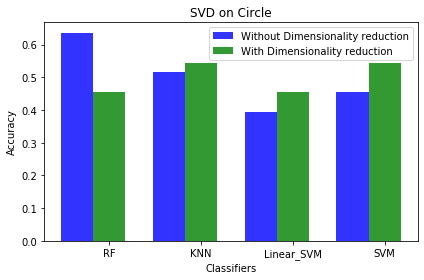

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_classifiers = 4
Accuracy = (0.6363636363636364,
 0.5151515151515151,
 0.3939393939393939,
 0.45454545454545453)
Accuracy_D = (0.45454545454545453,
 0.5454545454545454,
 0.45454545454545453,
 0.5454545454545454)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_classifiers)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Accuracy, bar_width,
alpha=opacity,
color='b',
label='Without Dimensionality reduction')

rects2 = plt.bar(index + bar_width, Accuracy_D, bar_width,
alpha=opacity,
color='g',
label='With Dimensionality reduction')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('SVD on Circle')
plt.xticks(index + bar_width, ('RF', 'KNN', 'Linear_SVM', 'SVM'))
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
PAccuracy_D = [10]
from sklearn.decomposition import PCA

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
PRF_D = metrics.accuracy_score(y_test, pred_test_std)
PRF_D

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), SVC(gamma=2, C=1))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
PSVM1_D = metrics.accuracy_score(y_test, pred_test_std)
PSVM1_D

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), SVC(kernel="linear", C=0.025))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
PSVM_D = metrics.accuracy_score(y_test, pred_test_std)
PSVM_D

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), KNeighborsClassifier(n_neighbors=5))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
PKNN_D = metrics.accuracy_score(y_test, pred_test_std)
PKNN_D

PAccuracy_D = [PRF_D, PKNN_D, PSVM_D, PSVM1_D]
PAccuracy_D

[0.5151515151515151,
 0.5454545454545454,
 0.45454545454545453,
 0.5454545454545454]

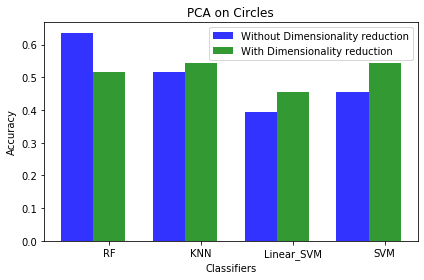

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_classifiers = 4
Accuracy = (0.6363636363636364,
 0.5151515151515151,
 0.3939393939393939,
 0.45454545454545453)
Accuracy_D = (0.5151515151515151,
 0.5454545454545454,
 0.45454545454545453,
 0.5454545454545454)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_classifiers)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Accuracy, bar_width,
alpha=opacity,
color='b',
label='Without Dimensionality reduction')

rects2 = plt.bar(index + bar_width, Accuracy_D, bar_width,
alpha=opacity,
color='g',
label='With Dimensionality reduction')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('PCA on Circles')
plt.xticks(index + bar_width, ('RF', 'KNN', 'Linear_SVM', 'SVM'))
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

std_clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
MRF_D = metrics.accuracy_score(y_test, pred_test_std)
MRF_D

std_clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2), SVC(gamma=2, C=1))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
MSVM1_D = metrics.accuracy_score(y_test, pred_test_std)
MSVM1_D

std_clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2), SVC(kernel="linear", C=0.025))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
MSVM_D = metrics.accuracy_score(y_test, pred_test_std)
MSVM_D

std_clf = make_pipeline(StandardScaler(),LinearDiscriminantAnalysis(n_components=2), KNeighborsClassifier(n_neighbors=5))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
MKNN_D = metrics.accuracy_score(y_test, pred_test_std)
MKNN_D

MAccuracy_D = [MRF_D, MKNN_D, MSVM_D, MSVM1_D]
MAccuracy_D

/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(12, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(12, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarn

[0.5454545454545454,
 0.42424242424242425,
 0.42424242424242425,
 0.45454545454545453]

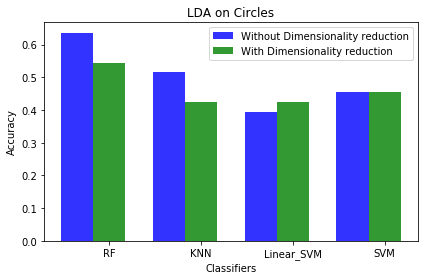

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_classifiers = 4
Accuracy = (0.6363636363636364,
 0.5151515151515151,
 0.3939393939393939,
 0.45454545454545453)
Accuracy_D = (0.5454545454545454,
 0.42424242424242425,
 0.42424242424242425,
 0.45454545454545453)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_classifiers)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Accuracy, bar_width,
alpha=opacity,
color='b',
label='Without Dimensionality reduction')

rects2 = plt.bar(index + bar_width, Accuracy_D, bar_width,
alpha=opacity,
color='g',
label='With Dimensionality reduction')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('LDA on Circles')
plt.xticks(index + bar_width, ('RF', 'KNN', 'Linear_SVM', 'SVM'))
plt.legend()

plt.tight_layout()
plt.show()